In [1]:
#standard imports

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy import stats

# TASK 1:

Business problem:
This assignment is about the predictive relationship between house’s price and living area size in square meters. You will also assess whether the house price is affected by having a swimming pool (0: for no swimming pool (NSP), 1: for swimming pool (SP)). Specifically, whether investing in the construction of a swimming pool increases the profitability of the sale.

### 1. Conduct an appropriate exploratory analysis on the house priced, for all houses. Discuss any cleaning of the data you did, including why and how you did it, or why you didn’t do it. Explore the distribution of the houses in the two subgroups with and without a swimming pool. (4 marks)

An exploratory analysis on the price of all houses in the data set was conducted, exploring the measures of central tendency, variance and quartile measures. From an initial boxplot on housing prices (Figure 1) there was a significant and unrealistic outlier on the housing price variable. From a further countplot analysis on the categorical variable indicating the presence of a swimming pool on a given house (Figure 2), it was apparent that the same data entry did not fit into either category (0: for no swimming pool (NSP), 1: for swimming pool (SP)). To directly assess the relationship between the categorical variable and housing price (in AUD), it was necessary to remove this exceptional entry as a measurement inaccuracy as seen in Figure 3 and Figure 4.

In [2]:
#read in data and display 5 first rows (head)
data = pd.read_csv('house_data.csv',index_col=0)
data.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,swimming_pool
id,,,,,,
1,221900,3,1.00,109.624675,524.897807,0
2,538000,3,2.25,238.758826,672.798216,0
3,180000,2,1.00,71.534745,929.022668,0
4,604000,4,3.00,182.088443,464.511334,0
5,510000,3,2.00,156.075808,750.650316,0


In [3]:
data['price'].describe().round(2) #Perform an description of the measures of central tendency and variance

count       21613.00
mean       544396.43
std        768519.62
min         75000.00
25%        321950.00
50%        450000.00
75%        645000.00
max      99999999.00
Name: price, dtype: float64

Text(0.5, 0, 'Swimming Pool')

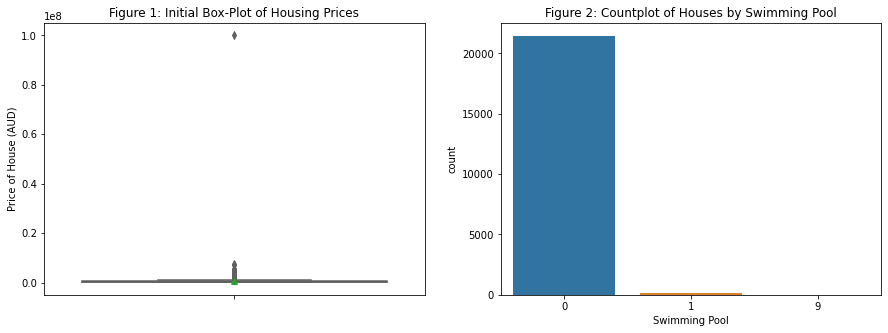

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.boxplot(ax=axes[0],y = 'price', data = data, palette = 'Blues', showmeans = True,)
ax2 = sns.countplot(ax=axes[1],x="swimming_pool", data=data)
ax1.set_title("Figure 1: Initial Box-Plot of Housing Prices")
ax1.set_ylabel("Price of House (AUD)")
ax2.set_title("Figure 2: Countplot of Houses by Swimming Pool")
ax2.set_xlabel("Swimming Pool")

The below filtering of exceptional data was performed by identifiying the index of the outlying data and performing a drop operation from the data. Although there were other exceptional data points within the sample of data, they were not significant enough to conclude as a data entry error. As such they should be included and analysed with the sample data and explored for their effect on the resultant conclusions. These outliers are also relevant to the evaluation of test assumptions in Q2.

In [5]:
i = data[data.swimming_pool == 9].index 
data.drop(i, axis=0, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,swimming_pool
id,,,,,,
1,221900,3,1.00,109.624675,524.897807,0
2,538000,3,2.25,238.758826,672.798216,0
3,180000,2,1.00,71.534745,929.022668,0
4,604000,4,3.00,182.088443,464.511334,0
5,510000,3,2.00,156.075808,750.650316,0


Text(0.5, 0, 'Swimming Pool')

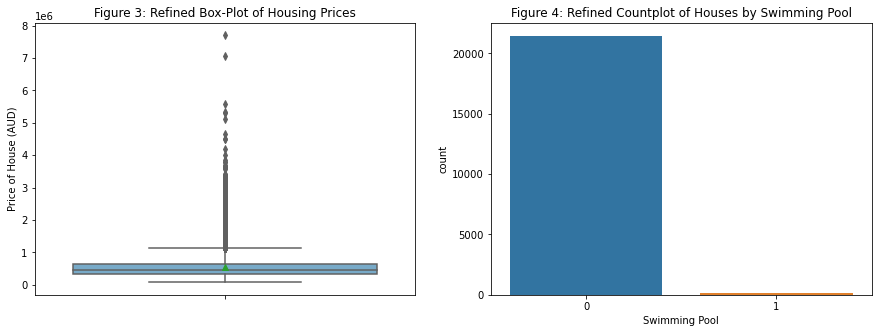

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.boxplot(ax=axes[0],y = 'price', data = data, palette = 'Blues', showmeans = True)
ax2 = sns.countplot(ax=axes[1],x="swimming_pool", data=data)
ax1.set_title("Figure 3: Refined Box-Plot of Housing Prices")
ax1.set_ylabel("Price of House (AUD)")
ax2.set_title("Figure 4: Refined Countplot of Houses by Swimming Pool")
ax2.set_xlabel("Swimming Pool")

The distribution of housing prices for houses with and without a swimming pool can be explored by forming individual boxplots for the categorical variable as shown in Figure 5. The shape of the distribution of housing prices for houses with and without swimming pools can also be represented by the histograms in Figure 6 and Figure 7.

Text(0.5, 0, 'Price of House (AUD)')

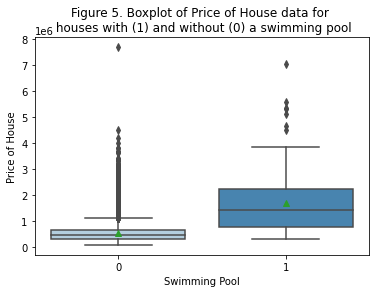

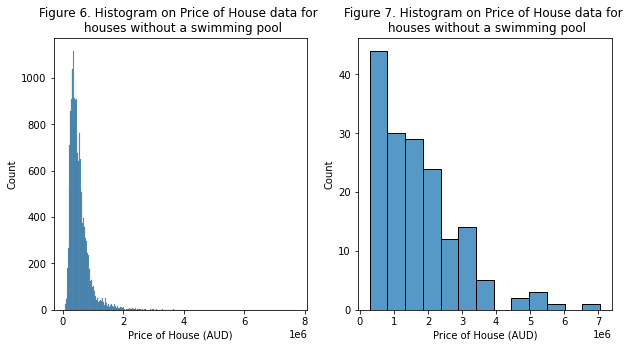

In [7]:
#When location is far the distribution behaves as on the left
#When location is close the distribution behaves as on the right
ax = sns.boxplot(x='swimming_pool', y='price', data=data, palette='Blues', showmeans = True)
ax.set_title("Figure 5. Boxplot of Price of House data for \n houses with (1) and without (0) a swimming pool")
ax.set_ylabel("Price of House")
ax.set_xlabel("Swimming Pool")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = sns.histplot(ax=axes[0], x='price',data=data[data.swimming_pool == 0])
ax2 = sns.histplot(ax=axes[1], x='price',data=data[data.swimming_pool == 1])
ax1.set_title("Figure 6. Histogram on Price of House data for \n houses without a swimming pool")
ax2.set_title("Figure 7. Histogram on Price of House data for \n houses without a swimming pool")
ax1.set_xlabel("Price of House (AUD)")
ax2.set_xlabel("Price of House (AUD)")

In [8]:
data.loc[data['swimming_pool']==0,'price'].describe().round(2)

count      21446.00
mean      530802.68
std       335502.90
min        75000.00
25%       320000.00
50%       450000.00
75%       639375.00
max      7700000.00
Name: price, dtype: float64

In [9]:
stats.describe(data.loc[data['swimming_pool']==0, 'price'])

DescribeResult(nobs=21446, minmax=(75000, 7700000), mean=530802.6772358482, variance=112562196676.67473, skewness=3.2526518674616858, kurtosis=23.628336854430366)

In [10]:
data.loc[data['swimming_pool']==1,'price'].describe().round(2)

count        165.00
mean     1707913.89
std      1189060.12
min       285000.00
25%       770000.00
50%      1410000.00
75%      2230000.00
max      7062500.00
Name: price, dtype: float64

In [11]:
stats.describe(data.loc[data['swimming_pool']==1, 'price'])

DescribeResult(nobs=165, minmax=(285000, 7062500), mean=1707913.8909090909, variance=1413863979426.9883, skewness=1.475180319021718, kurtosis=2.815551585480944)

From an initial exploratory analysis on the distribution of houses with and without a swimming pool, it is evident that both distributions are strongly right skewed as indicated by the trailing tail to the right of each distribution and the greater mean house price relative to their respective means. The descriptive statistics also suggest that the kurtosis of the NSP sample is much greater than 3. This has significant implications towards the assumptions of the t-test in Q2. Figure 5 shows that for the sample data, houses with a pool cost on average 1.18 million dollars more than those without. In addition to this, the observed data showed a greater sample standard deviation in houses with swimming pools (335502.90 AUD) compared to those without (1189060.12 AUD).

### 2. Conduct (with α = 0.05) the appropriate t-test, median and Mann-Whitney tests, to assess whether houses prices are typically higher for houses with swimming pool (the alternative of unequal prices is fine for the median test). Assess all assumptions made. (9 marks)

In [12]:
def deg_of_freedom(xbar1, var1, n1, xbar2, var2, n2):
    p1 = (var1 / n1 + var2 / n2) ** 2
    p2 = ((var1 / n1) ** 2 / (n1 - 1)) + ((var2 / n2) ** 2 / (n2 - 1))
    dof = p1 / p2
    return dof

print(deg_of_freedom(1707913.89,1189060.12**2,165.00,530802.68,335502.90**2,21446.00))
stats.ttest_ind(data.loc[data['swimming_pool']==1, 'price'],data.loc[data['swimming_pool']==0, 'price'], equal_var = False, alternative = 'greater')

164.20096868250653


Ttest_indResult(statistic=12.712257663969039, pvalue=1.624980053701819e-26)

#### One-sided Student t-test:

The hypotheses are:
$H_0:$ the two group means are equal: $\mu_{\text{SP}} = \mu_{\text{NSP}}$. 
$H_1:$ the group mean for SP is greater than NSP: $\mu_{\text{SP}} > \mu_{\text{NSP}}$.  

As specified in the outline, we choose $\alpha=0.05$ as standard.  

From the student t-test performed on housing data for houses with SP and NSP, a 12.71 test statistic was observed with approximately 164 degrees of freedom. The t-test was performed assuming that population variance of the groups were unknown and not equal as supported by the exploratory analysis in Q1. Assuming the null hypothesis of equal means, the probability of obtaining a test-statistic equal to or greater than 12.71 is very close to 0, as suggested by the p-value, $P(t_{164} \geq 12.71) = 1.6 \times 10^{-26}$. As this is less than the chosen significance level, 0.05, we reject the null hypothesis in favour of the null hypothesis with 95% confidence that the mean price of houses with SP is greater than that of houses with NSP.

The above test relies on the first assumption of identically and independently distributed data for each of the groups (SP and NSP). This assumption relies on simple random sampling from the population of houses on the market. This implies that the price of each house is independent for each group and that the probability distribution of each house price is identical. The second assumption we make is that the two groups are independent of each other such that the housing price with SP is independent of those with NSP. Although we make these two assumptions, it is difficult to know for sure if this is valid in reality and we would need more information on the sampling method. The third assumption is that the two samples are approximately normally distributed. The skewness of the two samples observed in Q1 suggest that each sample deviates from a normal distribution. Additionally, the kurtosis of the sample NSP is much larger than 3, further calling into question the validity of this assumption. The final assumption is a finite 4th moment of the housing price population. Although in reality housing prices are bound by a finite amount of money people are willing and able to spend, the huge number of outliers observed in Figure 5 calls into question this assumption. Under the specified assumptions we cannot validate the conclusions of the one-sided t-test on housing prices (with SP and NSP) with absolute certainty.

In [13]:
Y1 = data.loc[data['swimming_pool']==1, 'price']
Y2 = data.loc[data['swimming_pool']==0, 'price']
from scipy.stats import median_test
median_test(Y1, Y2, ties = "ignore")
#Ties determines how values equal to the grand median are classified in the contigency table
#Ignore does not include values equal to the grand median
#Function assumes the use of chi2_contingency
#(Test-stat, p-value, median, contingency table)


(122.4215547146189,
 1.8665104620127478e-28,
 450000.0,
 array([[  154, 10593],
        [   11, 10681]]))

#### Median test:

The hypotheses for the median test are as follows: 

$H_0: \mbox{median}_{SP} = \mbox{median}_{NSP}$
$H_1: \mbox{median}_{SP} \neq \mbox{median}_{NSP}$.

Once more, $\alpha = 0.05$ is chosen as the level of significance in order to compare the respective powers of each test.

The test statistic is $122.42$, which under the null follows a $\chi^2_1$ distribution. The p-value, $1.9 \times 10^{-28}$, indicates the probability of a $\chi^2_1$ random variable obtaining a test statistic equal to or more extreme than 122.42. As this is $< 0.05$, we must reject the null hypothesis and conclude with 95% confidence that there is a significant difference in the median of groups SP and NSP.

The first assumption made as in the student t-test is the independence of the two groups. The second assumption is that the data is independently and identically distributed for each group. Once more it is important to acknowledge these two assumption despite the difficulty of guaranteeing their validity. The third assumption made is that the data are at least on the ordinal scale. As price is a numerical variable, the ordinal property of the price variable is satisfied. Finally, it is important to acknowledge that the median test relies on the assumptions of Pearson's Test. The assumption that each cross tab expects at least 5 expected observations is validated by observing the above contingency table. As we expect $P(R>median)=0.5$, the expected value in each row of the first and second column is 82.5 and 10687 respectively ($\geq5$) suffices.

In [14]:
from scipy.stats import mannwhitneyu
mannwhitneyu(Y1, Y2, alternative='greater')

MannwhitneyuResult(statistic=3133582.0, pvalue=8.847188788500763e-66)

#### Mann-Whitney Test:

The hypotheses for the Mann-Whitney Test are as follows: 

$H_0:$ Y in group SP has the same distribution as $Y$ in group NSP: $P(Y_{\text{SP}} > Y_{\text{NSP}}) = 0.5$ 

$H_1:$ Y in group SP has a right-shifted distribution compared to $Y$ in group NSP: $P(Y_{\text{SP}} > Y_{\text{NSP}}) \gt 0.5$.
                    
For consistency, $\alpha = 0.05$ is used as the significance level for this test. The U statistic counts for each observation in one group, the number of observations in the opposite group that are greater in rank. This statistic is a measure of the difference in the sum of the ranks in each group. In this case, $U = 3.13\times10^6$, which under the null follows a large sample normal distribution with mean and variance as given by the test. The p-value is obtained ($8.85\times10^{-66}$), by standardizing the U statistic and finding the probability of obtaining an equal to or greater value using a standard normal distribution. As the p-value is once more less than 0.05, we reach the same conclusion and reject the null hypothesis, concluding with 95% confidence that there is a significant positive shift in the distribution of Y for group SP compared to NSP.

The first two assumptions made are independence of the two groups and i.i.d in each group as specified in the other two tests. Similarly here, these assumptions are assumed true but are difficult to validate. As stated in the median test, prices are ordinal, giving meaning to the analysis of $P(Y_{\text{SP}} > Y_{\text{NSP}})$. For each group, the assumptions of the central limit theorem rely on sufficiently large enough samples. As the rank distribution is uniform, hence symmetric with light tails, $n\geq8$ sample size is enought to satisfy this assumption. This is validated by the sufficiently large samples identified in the exploratory analysis.

### 3. Which test’s result do you believe the most in Task 2? Discuss and explain. (2 marks).

The t-test relies on strong assumptions of a finite 4th moment of the housing price population and normality of distributions as specified in question 2. The presence of a huge amount of outliers calls into question the validity of the results from the t-test where we rely on a strict finite kurtosis in the population. In both the median and Mann-Whitney U test, we observe a significantly lower order p-value that can be linked to the robust nature of both tests to outliers in the sample data. This is supported by the property of higher power in the two non-parametric tests when the assumptions of the t-test cannot be satisfied. As both the non-parametric tests satisfied assumptions relatively well, and the Mann-Whitney test has considerally higher power than the median test, I trust in the results drawn from this test the most.

### 4. Conduct an appropriate exploratory analysis to assess whether there may be a linear relationship between houses’ prices and living area size in square meters. (3 marks)

Text(0.5, 1.0, 'Figure 8. Scatter plot of housing prices (AUD) against living area $(m^2)$')

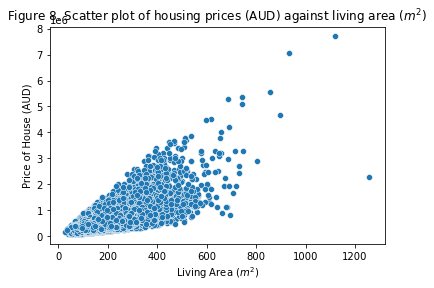

In [15]:
ax = sns.scatterplot(y = data['price'], x = data['sqm_living'])
ax.set_ylabel('Price of House (AUD)')
ax.set_xlabel('Living Area $(m^2)$')
ax.set_title('Figure 8. Scatter plot of housing prices (AUD) against living area $(m^2)$')

In [16]:
data['sqm_living'].describe().round(2)

count    21611.00
mean       193.20
std         85.19
min         26.94
25%        132.48
50%        177.44
75%        236.90
max       1257.90
Name: sqm_living, dtype: float64

In [17]:
data.corr()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,swimming_pool
price,1.000000,0.308290,0.523571,0.701273,0.089973,0.281031
bedrooms,0.308290,1.000000,0.515657,0.576627,0.031655,-0.004671
bathrooms,0.523571,0.515657,1.000000,0.753979,0.087713,0.067972
sqm_living,0.701273,0.576627,0.753979,1.000000,0.172959,0.110958
sqm_lot,0.089973,0.031655,0.087713,0.172959,1.000000,0.021844
swimming_pool,0.281031,-0.004671,0.067972,0.110958,0.021844,1.000000


An initial scatter plot on the effect of living area on housing prices (Figure 8) indicates a potentialy positively-sloped linear relationship. We have established housing price as the response variable as it is determined based on fixed attributes of the specific house (e.g. living area). At first glance it appears as though as living area increases, the price of housing similarly increases. As a further insight, the increasing dispersion of the scattered data as living area increases calls into question the validity of the homoskedastic assumption of residuals (this will be explored in Q5). As this is an observational study, i.e explanatory variables and responses are not controlled, it is difficult to perfectly isolate the effects of the two variables from other possible confouding factors. Considering the contextual information, it would make sense to assess the relationship between living area and housing price as living area precedes housing price and would expectedly increase sale value. Finally, from assessing the matrix of correlation coefficients between each data variable, the coefficient between price and living area (0.70) suggests that there is a strong positive relation that should be explored further.

### 5. Conduct a simple linear regression analysis, first using OLS and then using LAD estimation, for houses’ prices on living area size in square meters. Fully assess all assumptions. (10 marks)

In [18]:
# re-fit SLR by OLS assuming LSA 1-5 first
import statsmodels.formula.api as smf
reg = smf.ols(formula='price ~ sqm_living', data=data).fit(cov_type='HC0')
reg.summary()    # not using print here possibly makes the output a bit nicer to look at

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     2676.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:06:03   Log-Likelihood:            -3.0011e+05
No. Observations:               21611   AIC:                         6.002e+05
Df Residuals:                   21609   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.008e+04   1.03e+04     -3.902      0.000   -6.02e+04   -1.99e+04
sqm_living  3001.4649     58.025     51.727      0.000    2887.737    3115.192
==============================================================================
Omnibus:                    14296.559   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458156.591
Skew:                           2.718   Prob(JB):                         0.00
Kurtosis:                      24.892   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Text(0.5, 1.0, 'Figure 10. Regression plot of housing price (AUD) against living area $(m^2)$')

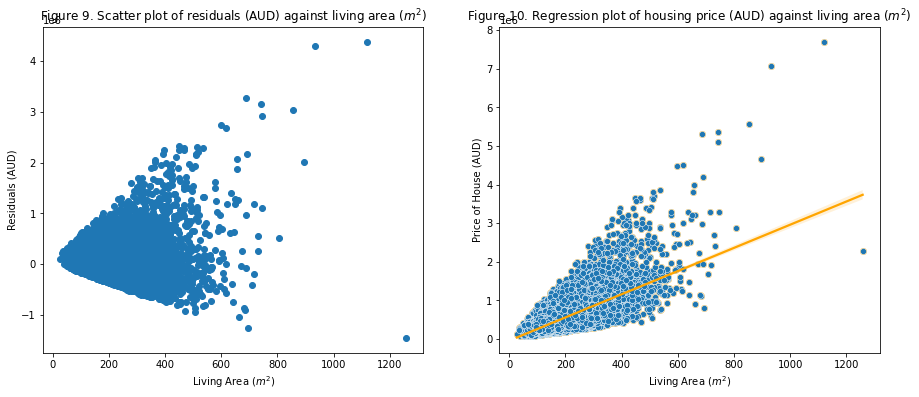

In [19]:
resid = reg.resid
fit = reg.fittedvalues
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data['sqm_living'], resid)
ax1.set_ylabel('Residuals (AUD)')
ax1.set_xlabel('Living Area $(m^2)$')
ax1.set_title('Figure 9. Scatter plot of residuals (AUD) against living area $(m^2)$')
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.regplot(x = data['sqm_living'], y = data['price'], color = 'orange')
ax2 = sns.scatterplot(x = data['sqm_living'], y = data['price'])
ax2.set_ylabel('Price of House (AUD)')
ax2.set_xlabel('Living Area $(m^2)$')
ax2.set_title('Figure 10. Regression plot of housing price (AUD) against living area $(m^2)$')

The exploratory analysis provided insight into the possible heteroskedastic nature of the observed data. To validate this hypothesis, the ordinary least squares was conducted and regression results were observed using the heteroskedastic-robust SE. The resultant residuals were then plotted against living area in Figure 9 to validate the observations in the exploratory analysis. As in Figure 9, it is apparent that the residuals become exceedingling dispersed as living area increases. Additionally, in the case particularly when living area is high, there is a larger number of observed positive residuals. From these observations, we cannot validate the assumption of homoskedastic residuals and as such must rely on the heteroskedastic-robust SE when evaluating the linear relationship. From the regression summary, the coefficient of b1, $3001.46$, implies that with a unit increase in the living area $(m^2)$, the typical increase in price is $3001.46$ (AUD), keeping all else constant (ceteris paribus). The y-intercept, $-4.01 \times 10^4$, (taken literally) implies that the average price of a house with a living area of $0m^2$ is $-4.01 \times 10^4$ (AUD), keeping all else constant. This is not practical in reality as 0$m^2$ does not exist in the range of sampled living area (you can not purchase a house with no living area).

In [20]:
hypothesis = 'sqm_living = 0'
t_test = reg.t_test(hypothesis)  # 2-sided t-test  H0: beta_1 = 0 (Predicting actual beta_1, NOT beta_1_hat)
print(t_test)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0          3001.4649     58.025     51.727      0.000    2887.737    3115.192


In order to test that the slope coefficient, $\beta_1$, is significant and not equal to 0, we must construct a hypothesis test using the heteroskedastic-robust SE (as justified above).

The hypotheses for the OLS are as follows:

$H_0: \beta_1 = 0$  
$H_1: \beta_1 \neq 0$

$\alpha = 0.05$ is set as the standard level of significance. Using the formula for the test statistic,  $t-stat = \frac{\hat{\beta_1}}{SE (\hat{\beta_1})} = \frac{3001.46}{58.03} = 51.73$. Using 21611 - 2 = 21609 degrees of freedom, the p-value obtained is $2 \times P(t_{21609} > 51.73) = 0.000$. Since p-value is less than 0.05, we can reject the null hypothesis that $\beta_1 = 0$ in favour of the alternate. This concludes that there is a linear relationship between living area and housing price at the 0.05 significance level.

The above test assumes the first 4 LSA of linearity, exogeneity, independence and finite 4th moment. Linearity makes the assumption of the functional form $Y = \beta_0 + \beta_1X_1$. As observed in Figure 10, the regression plot follows a relatively linear path, implying the mean of Y given X is a straight line. One limitation of this assumption is the significant number of points that lie above the predicted regression as living area increases which may suggest a non-linear relationship. The second assumption of exogeneity implies that $E(\epsilon|X)=0$, in other words all other characteristics (including factors in $\epsilon$) are independent of X. This assumption is implicit in the design of the OLS by enforcing $E(e_i)=0$ and $E(X_ie_i)=0$. Similarly, Figure 9 shows limited indication of a relationship between residuals, validating this assumption. The assumption of independent and identical distribution of data pairs $Y_i$ and $X_i$, i.e $(Y_i, X_i)$ and $(Y_j, X_j)$ are jointly independent. This assumption cannot be validated for sure as the sampling method for the data is unknown. Finally, finite 4th moment of X and Y implies that outliers are rare and moderate. Although some strong outliers are observed, the price and area variables are restricted by a fixed bound of available land and money people are able to spend on a house.

In [21]:
mod = smf.quantreg('price ~ sqm_living', data=data)
res = mod.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.2480
Model:                       QuantReg   Bandwidth:                   3.149e+04
Method:                 Least Squares   Sparsity:                    4.833e+05
Date:                Fri, 31 Mar 2023   No. Observations:                21611
Time:                        15:06:05   Df Residuals:                    21609
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     5.3e+04   4074.475     13.007      0.000     4.5e+04     6.1e+04
sqm_living  2330.8640     19.297    120.787      0.000    2293.040    2368.688
==============================================================================
"""

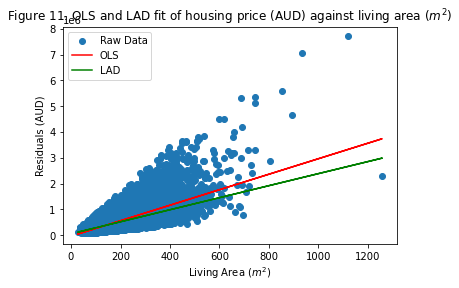

In [22]:
fit1 = reg.fittedvalues
fit2 = res.fittedvalues

plt.scatter(data['sqm_living'], data['price'])
plt.plot(data['sqm_living'], fit1, color='red')
plt.plot(data['sqm_living'], fit2, color='green')
#plt.show()
plt.ylabel('Residuals (AUD)')
plt.xlabel('Living Area $(m^2)$')
plt.title('Figure 11. OLS and LAD fit of housing price (AUD) against living area $(m^2)$')
plt.legend(['Raw Data', 'OLS','LAD'])

The LAD relaxes the assumption of finite 4th moment and provides a model that is more robust to significant outliers in the data. Where we previously minimised the residual sum of squares in the OLS prediction, here we minimise the absolute sum of residuals. As implied by the minimisation, LAD gives less weighting to higher magnitude residuals and hence is more robust to outlying data. The coefficient b1, $2330.86$, states that as living area increases by 1$m^2$, the typical house price increases by $2330.86$ AUD, keeping everything else constant. The y-intercept, $5.3\times10^4$, (taken literally) implies that the average price of a house with living area of 0$m^2$ is $5.3\times10^4$ AUD, keeping everything else constant. Once more, this is not practical as specified for the OLS estimation as a house with no living area cannot be purchased.

In [23]:
hypothesis = 'sqm_living = 0'
t_test = res.t_test(hypothesis)  # 2-sided t-test  H0: beta_1 = 0 (Predicting actual beta_1, NOT beta_1_hat)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          2330.8640     19.297    120.787      0.000    2293.040    2368.688


In order to test that the slope coefficient, $\beta_1$, is significant and not equal to 0, we must once more construct a hypothesis test using the LAD standard error (homoskedastic assumption is less relevant for the LAD approach).

The hypotheses for the OLS are as follows:

$H_0: \beta_1 = 0$  
$H_1: \beta_1 \neq 0$

$\alpha = 0.05$ is set as the standard level of significance. Using the formula for the test statistic,  $t-stat = \frac{\hat{\beta_1}}{SE (\hat{\beta_1})} = \frac{2330.86}{19.30} = 120.79$. Using 21611 - 2 = 21609 degrees of freedom, the p-value obtained is $2 \times P(t_{21609} > 120.79) = 0.000$. Since p-value is less than 0.05, we can reject the null hypothesis that $\beta_1 = 0$ in favour of the alternate. This concludes that there is a linear relationship between living area and housing price at the 0.05 significance level.

The above results make use of the 6 LAD assumptions (not including the equal variance of errors assumption). As justified in the OLS assumptions using Figure 9 and 10, we make the assumption of linearity. The second assumption of LAD is the median of $\epsilon|X = 0$. As designed and shown by the descriptive residual statistics below, the median error term is 0. The third assumption of the LAD approach is an independent and identical distribution of data pairs $Y_i$ and $X_i$, i.e $(Y_i, X_i)$ and $(Y_j, X_j)$ are jointly independent. Once more we would have to investigate the sampling approach to validate this assumption. The fourth assumption, continuity of density, states that the probabaility distribution of $Y_i$ given $X_i$ is a continuous function. In reality we are unsure about the true density function of this variable but we assume here that it is continuous. The fifth assumption is a finite absolute first moment of the Y variable. This is easy to validate by observing the mean of housing price as in question 1 and contextual knowledge of a realistic finite price of houses. Finally the 6th assumption of finite second moment of X (living area). The descriptive statistics in Q4, namely the finite sample standard deviation of living area, imply that it is safe to assume a finite population variance for this variable.

In [24]:
resid = res.resid
resid.describe().round(2)

count      21611.00
mean       36480.56
std       266122.41
min      -872735.11
25%      -116210.48
50%            0.00
75%       124828.72
max      5037665.43
dtype: float64

### 6. Write a brief (e.g. 0.5 page) report summarising and discussing your findings and conclusions. Include a discussion of whether you would recommend adding a swimming to a property in view of increasing its sale value based on your findings. (4 marks)

From my findings in Question 2, accepting the conclusions of the Mann-Whitney U test imply that there is a relationship between a swimming pool and greater housing price. We can accept this assumption with 95% confidence as the standard level of significance for the one-sided tests was set to 0.05. In order to safely recommend the addition of a swimming pool to the property, we must know the specific cost of swimming pool installation and maintenence. In addition to this we may be interested in the future, long-term valuation of the house with the addition of a swimming pool. From here another one-sided test should be performed to assess that the price difference between SP and NSP is more significant than the cost itself. Under these circumstances I would recommend adding a swimming pool to the property to increase the sale value. From the conclusions of Q2 however, we cannot rule out the recommendation of adding a swimming pool as it at the very least increased property price. To address the question at hand, from Q2 we are 95% confident that the addition of a swimming pool will increase the sale value of the property.

From the conclusions of Q5, we can safely accept a linear relationship between living area and housing price. The assessment of assumptions from both estimations suggest that we can accept the conclusions of a linear relationship with 95% confidence. From analysising the r-squared, 0.492, the explanatory power of living area on the hosuing prices is relatively mild. As such it may be relevant to explore the affect of additional variables to the adjusted r-squared such as the number of bedrooms. One additional opportunity for further analysis of this regression would be to explore the extent to which an increase in living area affects the housing price. From there it may be interesting to explore how this relationship compares to the relationship between area of land plot and its associated price. This could provided interesting implications on decisions of how big a plot of land to build a house upon to maximise price-expense relationships.

# TASK 2:

###  1. Is the mean of the estimated residuals from your OLS regression still equal 0, i.e. $\bar{e} = 0$? How does your answer relate to LSA 2? (2 marks)

When performing this OLS estimation, we minimise the RSS expression below:
$$
\sum_{i=1}^{n} (Y_i-b_1X_i)^2
$$
As we are minimising the expression by determining the value of $b_1$ only, we simply perform a partial derivative with respects to this term. As we omit the $b_0$ term, we no longer perform the partial derivative with respects to $b_0$. This also suggests that the following expression is no longer guaranteed.
$$
\sum_{i=1}^{n} (Y_i-\hat{Y}) = \sum_{i=1}^{n} (e_i) = 0
$$
From this we can then state that there is no restriction of $(n-1)\bar{e}$ and by extension, $\bar{e}$, to equal 0. This also suggests that the LSA of exogeneity fails as there is no assurance that the expected value, $E(\epsilon|X)$, is equal to zero.

### 2. Is the correlation between the estimated residuals and the observed x’s still equal 0. (5 points)

The general formula for the correlation of to variables is shown below.
$$
Cor(X,Y)=\frac{Cov(X,Y)}{S_XS_Y}
$$
As such, we can assess from the covariance, $Cov(X,e) = E[(X-E(X))(e-E(e))]$, whether there is zero correlation between the estimated residuals and the observed X's. We can convert the expectation expression of covariance into summation form.
$$
\mbox{Cov}(X,e) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(e_i -\bar{e}) =  \frac{1}{n-1} [\sum_{i=1}^n (X_ie_i) -  \sum_{i=1}^n (X_i\bar{e}) - \sum_{i=1}^n (\bar{X}e_i) + \sum_{i=1}^n (\bar{X}\bar{e})]
$$

Simplifying further, the constant terms can be taken out of each expression to give the following form.
$$
\frac{1}{n-1} [\sum_{i=1}^n (X_ie_i) -  \bar{e}\sum_{i=1}^n (X_i) - \bar{X}\sum_{i=1}^n (e_i) + (n-1)(\bar{X}\bar{e})]
= \frac{1}{n-1} [\sum_{i=1}^n (X_ie_i) -  (n-1)(\bar{X}\bar{e}) - (n-1)(\bar{X}\bar{e}) + (n-1)(\bar{X}\bar{e})]
$$
Cancelling out identical terms, we achieve the following expression:
$$
\frac{1}{n-1} [\sum_{i=1}^n (X_ie_i) -  (n-1)(\bar{X}\bar{e})]
$$

By definition of the OLS estimation, we minimised the RSS term by equating the partial derivative with respect to b1 to 0. This gives the following expression that can be used to show that $\sum_{i=1}^n (X_ie_i)=0$.

$$
RSS = \sum_{i=1}^n (Y_i-b_1X_i)^2
$$

$$
\frac{\partial{RSS}}{\partial{b_1}} = -2\sum_{i=1}^n X_i(Y_i-b_1X_i) = 0
$$

$$
\sum_{i=1}^n X_ie_i = 0
$$

Substituting this identity into the previous expression for covariance, we distill the expression to the following:

$$
\frac{1}{n-1} [\sum_{i=1}^n (X_ie_i) -  (n-1)(\bar{X}\bar{e})] = \frac{1}{n-1} [-  (n-1)(\bar{X}\bar{e})] = -\bar{X}\bar{e}
$$

As there is no restriction of $\bar{X}$ or $\bar{e}$ equalling zero, as discussed in Q1, we cannot state that the covariance equals zero. Hence, the correlation between the estimated residuals and observed Xs is not 0.

### 3. What form does the OLS estimator of the slope coefficient in your regression have? (2 marks)

Let's return to the partial derivative expression found in Q2:
$$
\frac{\partial{RSS}}{\partial{b_1}} = -2\sum_{i=1}^n X_i(Y_i-b_1X_i) = 0
$$

Forming an OLS estimator of the slope coefficient requires rearranging this formula to make $b_1$ the subject of the equation. This can be done by first expanding the summation and splitting it into subsidiary summation expressions as shown below. As we are equating the expression to zero, we can ignore the constant coefficient -2.
$$
\sum_{i=1}^n X_i(Y_i-b_1X_i) = \sum_{i=1}^n (X_iY_i-b_1X_i^2) = \sum_{i=1}^n (X_iY_i)-\sum_{i=1}^n(b_1X_i^2) = 0
$$

The constant term of interest, $b_1$, can then be extracted from the summation and rearranged to be the subject.
$$
\sum_{i=1}^n (X_iY_i)-b_1\sum_{i=1}^n(X_i^2) = 0
$$
$$
b_1 = \frac{\sum_{i=1}^n (X_iY_i)}{\sum_{i=1}^n(X_i^2)}
$$

### 4. Show whether or not the OLS estimator of your regression is still an unbiased estimator of the true β1. (3 marks)

To prove that $b_1$ is an unbiased estimator of $\beta_1$ we must prove the following:
$$
E(b_1) = \beta_1
$$
Substituting in the expression found in Q3, we must prove the following:
$$
E(\frac{\sum_{i=1}^n (X_iY_i)}{\sum_{i=1}^n(X_i^2)}) = \beta_1
$$
Here we are not concerned with the $X_i$ term as it is the independent variable and not determined by the OLS estimator. As such we are simply concerned with the expected value of the $Y_i$ term as shown below.
$$
E(\frac{\sum_{i=1}^n (X_iY_i)}{\sum_{i=1}^n(X_i^2)}) = \frac{\sum_{i=1}^n (X_iE(Y_i))}{\sum_{i=1}^n(X_i^2)}
$$
In this OLS regression, the expected value of $Y_i$ is simply $\beta_1X_i$ where $\beta_1$ is the true slope coefficient. Substituting this in, bringing out the constant term, and simplifying further, we reach the following conclusion.
$$
\frac{\sum_{i=1}^n (X_iE(Y_i))}{\sum_{i=1}^n(X_i^2)} = \frac{\sum_{i=1}^n (X_i(\beta_1X_i))}{\sum_{i=1}^n(X_i^2)} = \frac{\sum_{i=1}^n (\beta_1X_i^2)}{\sum_{i=1}^n(X_i^2)} = \beta_1 \frac{\sum_{i=1}^n (X_i^2)}{\sum_{i=1}^n(X_i^2)} = \beta_1
$$

By proving the initial relationship, we can affirm that the OLS estimator is an unbiased estimator of the true $\beta_1$.